94.89559164733178% accuracy of the test set

Misclassified Images:


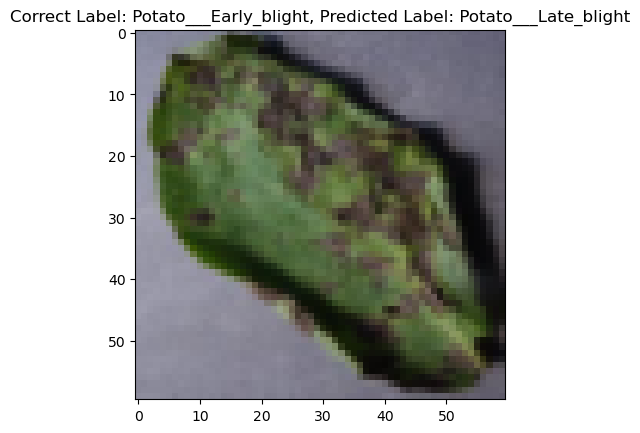

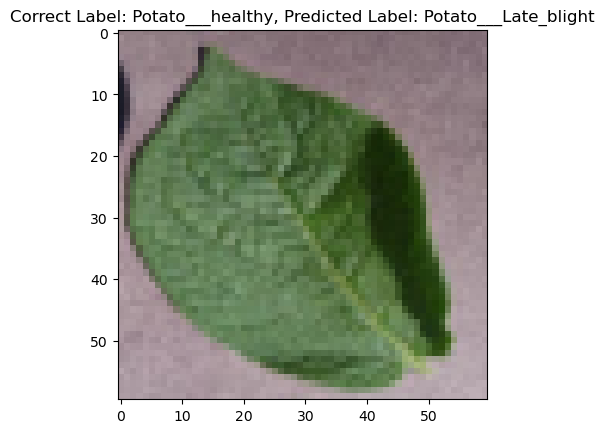

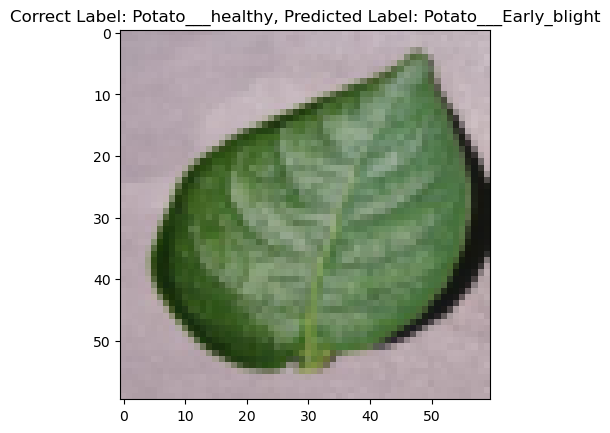

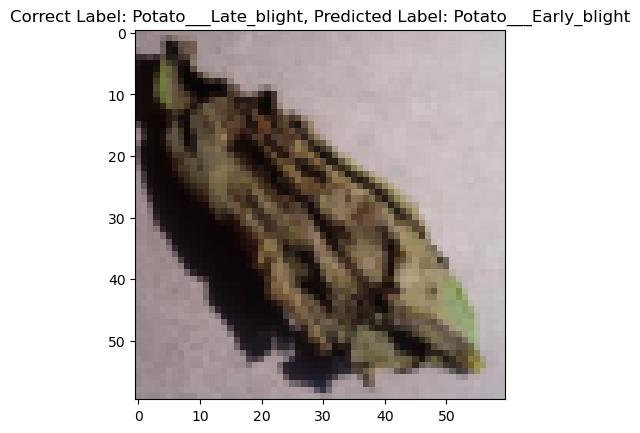

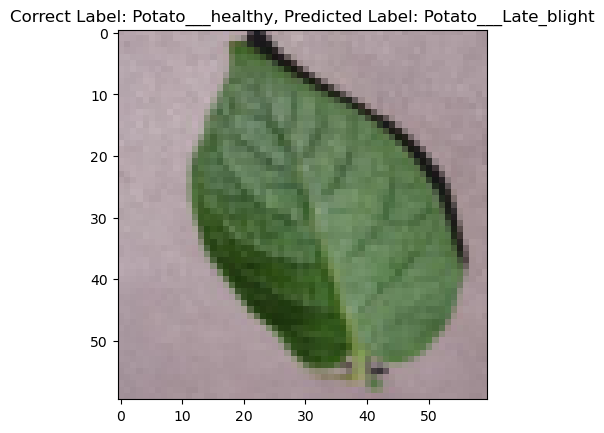

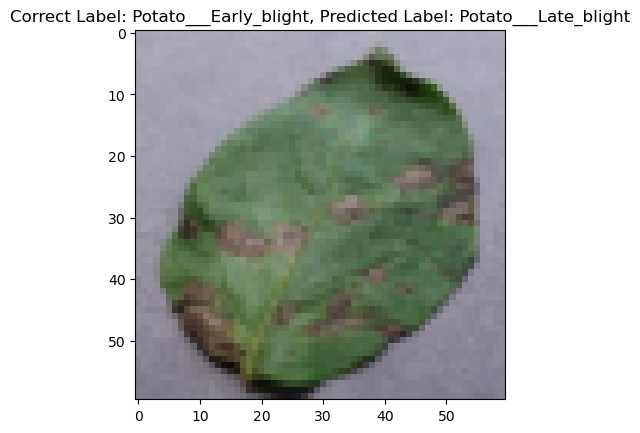

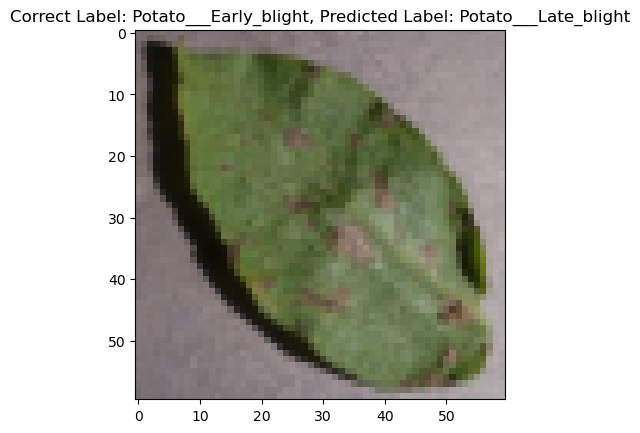

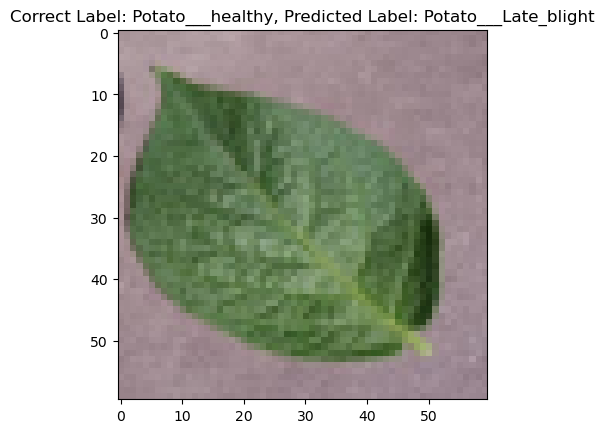

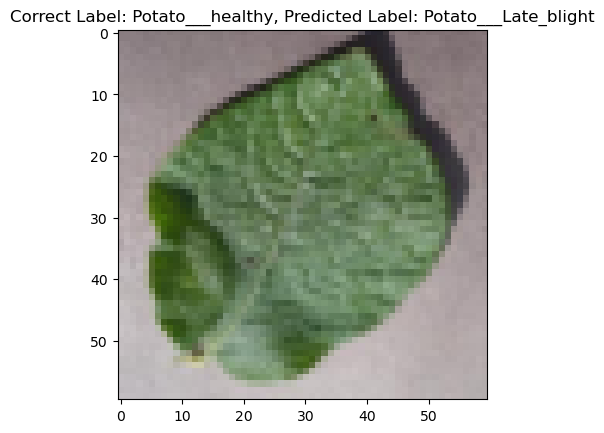

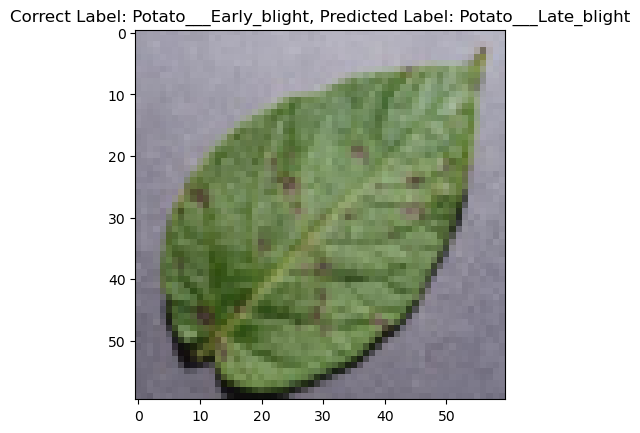

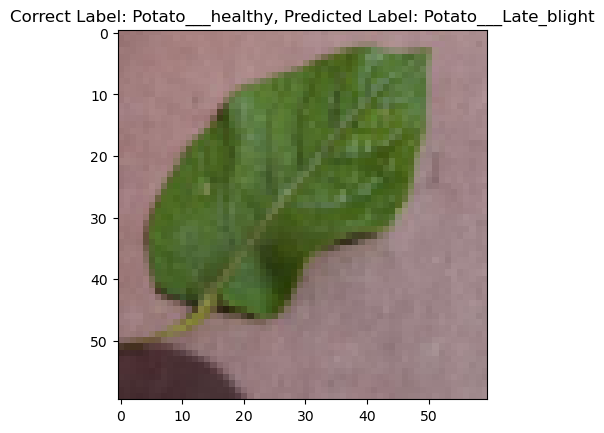

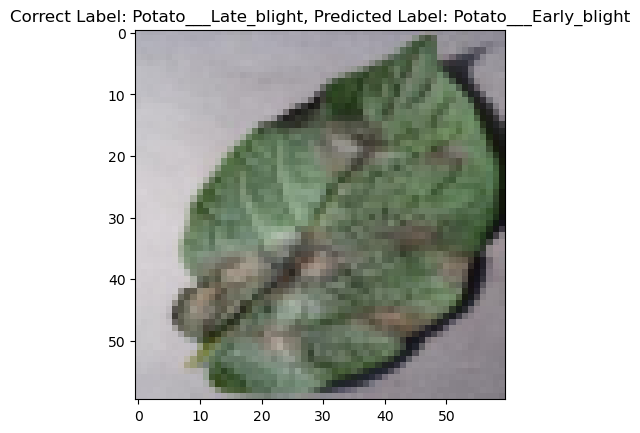

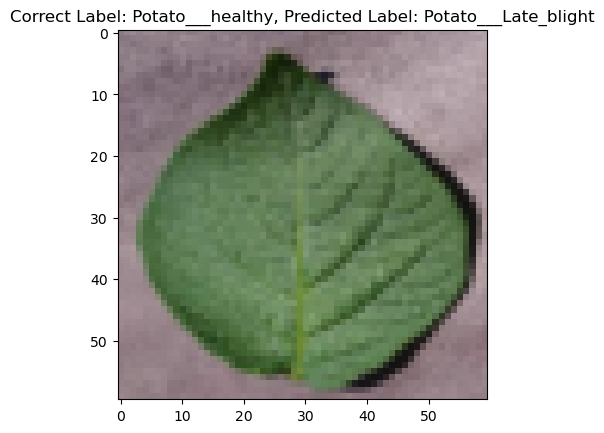

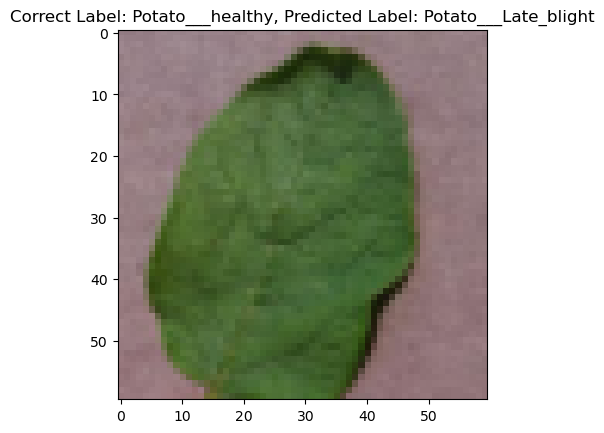

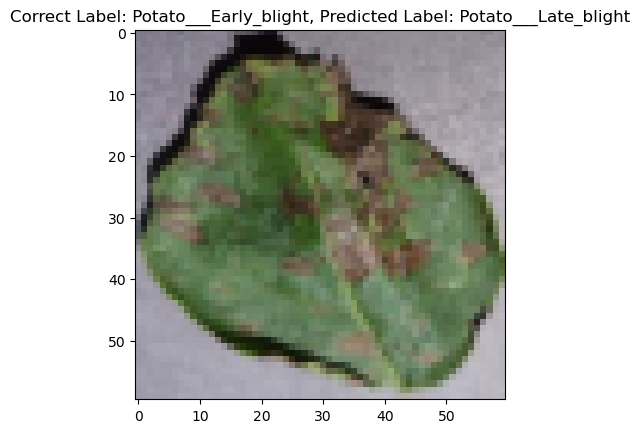

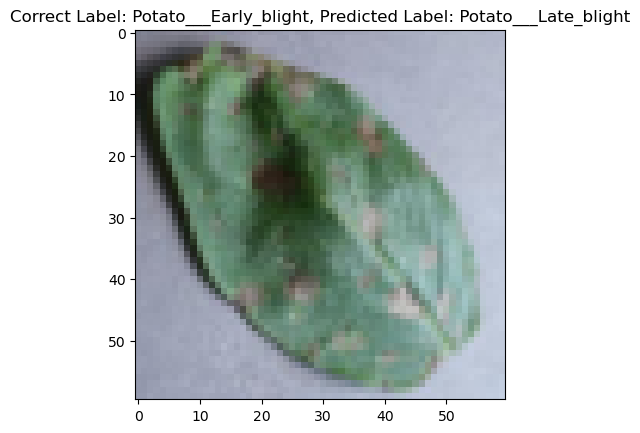

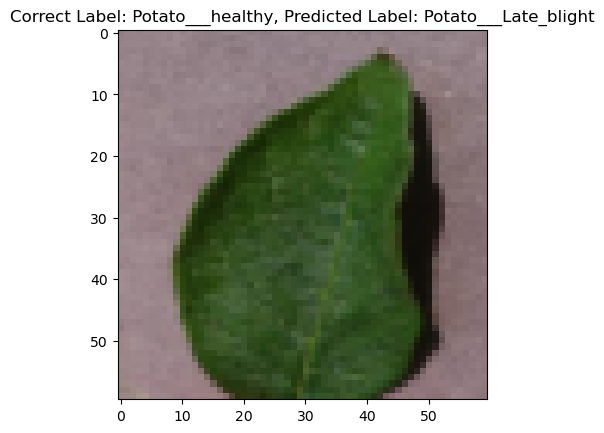

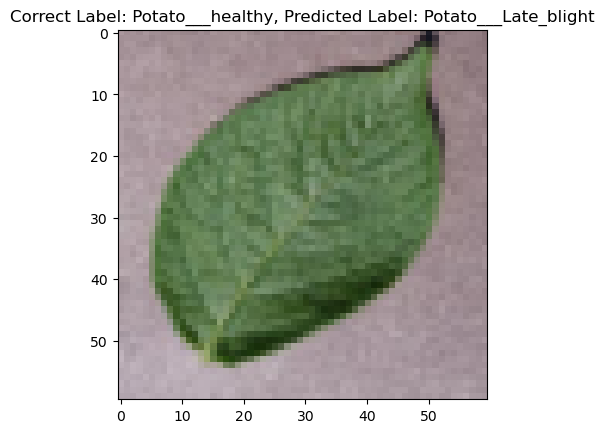

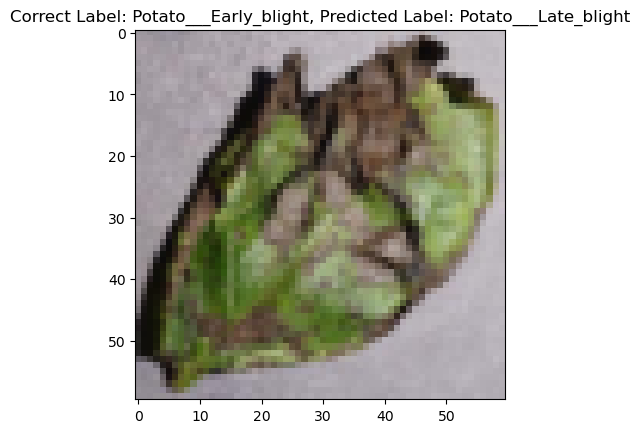

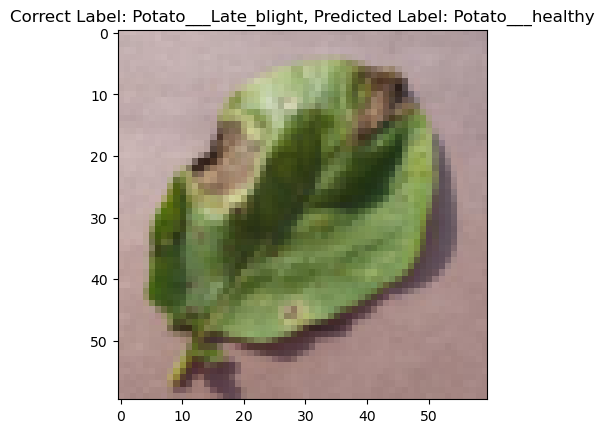

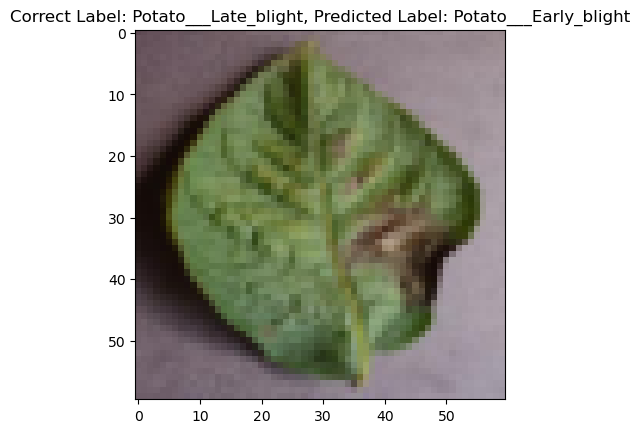

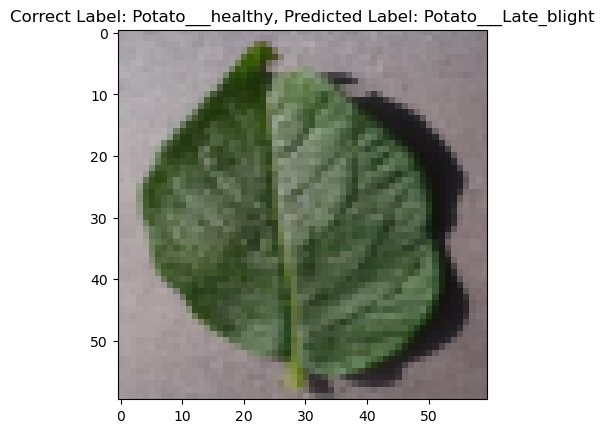

In [1]:
#SVM using sklearn
#to see the ouptput images better, increae Pixel_x and Pixel_y from 20, 20 to 60, 60

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import pickle
from skimage.io import imread
from skimage.transform import resize

# CONSTANTS
pixel_x = 20
pixel_y = 20

# PREPARE DATA
# get data set (PlantVillage folder) from directory this file is saved in
current_dir = os.getcwd()
data_folder = 'PlantVillage'
input_dir = os.path.join(current_dir, data_folder)

# name categories the same as their folder names
categories = ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

# Prepare data
processed_labels = [] 
processed_data = []  
 

for cat_x, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        image_data = imread(img_path)
        image_proc_data = pixel_x
        resized_image = resize(image_data, (pixel_x, pixel_y))  # Resize image to specified dimensions
        flattened_data = resized_image.flatten()  # Flatten the image data to a 1D array
        processed_data.append(flattened_data)  
        processed_labels.append(cat_x) 

processed_data = np.asarray(processed_data)
processed_labels = np.asarray(processed_labels)


# DATA SPLIT
x_train, x_test, y_train, y_test = train_test_split(processed_data, processed_labels, test_size=0.20, shuffle=True, stratify=processed_labels)
#20% of data is test set, 80% is training set


#  TRAIN 
svm_classifier = SVC() 

# Define a range of values for hyperparameters
tuning_parameters = [{'gamma': [0.001, 0.0001, 0.00001], 'C': [10, 100, 1000, 10000]}]

# Use GridSearchCV for hyperparameter tuning
hyperparameter_search = GridSearchCV(svm_classifier, tuning_parameters)

# Fit the model to the training data
hyperparameter_search.fit(x_train, y_train)

# Get the best estimator from the search
best_svm_estimator = hyperparameter_search.best_estimator_


# TEST the performance of the model on the test set
predictions_on_test = best_svm_estimator.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(predictions_on_test, y_test)

# Print the accuracy
print('{}% accuracy of the test set'.format(str(accuracy * 100)))


misclassified_indices = np.where(predictions_on_test != y_test)[0]

print('\nMisclassified Images:')
for idx in misclassified_indices:
    misclassified_img = x_test[idx].reshape(pixel_x, pixel_y, 3)  # Reshape to original image dimensions
    correct_label = categories[y_test[idx]]
    predicted_label = categories[predictions_on_test[idx]]

    
    # Display the misclassified image
    plt.imshow(misclassified_img)
    plt.title(f"Correct Label: {correct_label}, Predicted Label: {predicted_label}")
    plt.show()

# Save the best SVM estimator to a file
pickle.dump(best_svm_estimator, open('./svm_model.p', 'wb'))  # Save the model as svm_model.p in the same folder

